In [1]:
# birdy client for communication with the server:
from birdy import WPSClient
# import birdy 

# handling files and folders
from os import path, listdir
from urllib import request
import time

# to display external png graphics in notebook: 
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
finch_server = 'http://localhost:5000/wps'   # finch 
finch_i = WPSClient(url=finch_server, progress=True)
# finch = WPSClient(finch_server)

In [3]:
data_file = '/home/testuser/data/cordex/tas/day/pr_CAS-44_MOHC-HadGEM2-ES_historical_r1i1p1_BOUN-RegCM4-3_v5_day_20010101-20051130.nc'

In [12]:
subset = finch_i.subset_bbox(resource=data_file, lon0=60.0, lon1=85.0, lat0=30.0, lat1=50.0,)

In [16]:
subset.get()  # [0]

subset_bboxResponse(
    output='http://localhost:5000/outputs/cbaef3f6-2cfe-11eb-8b72-08002749b4f3/pr_CAS-44_MOHC-HadGEM2-ES_historical_r1i1p1_BOUN-RegCM4-3_v5_day_20010101-20051130_sub.nc',
    ref='http://localhost:5000/outputs/cbaef3f6-2cfe-11eb-8b72-08002749b4f3/input.meta4'
)

In [18]:
cdd = finch_i.cdd(subset.get()[0])

In [19]:
cdd.get()

cddResponse(
    output_netcdf='http://localhost:5000/outputs/478bf19e-2d00-11eb-bdb6-08002749b4f3/cdd_CAS-44_MOHC-HadGEM2-ES_historical_r1i1p1_BOUN-RegCM4-3_v5_yr_20010101-20050101.nc',
    output_log='http://localhost:5000/outputs/478bf19e-2d00-11eb-bdb6-08002749b4f3/log.txt',
    ref='http://localhost:5000/outputs/478bf19e-2d00-11eb-bdb6-08002749b4f3/input.meta4'
)

In [22]:
xar_cdd = cdd.get(asobj=True)[0]

In [50]:
from netCDF4 import Dataset

In [52]:
ds = Dataset('/home/testuser/data/cdd_CAS-44_MOHC-HadGEM2-ES_historical_r1i1p1_BOUN-RegCM4-3_v5_yr_20010101-20050101.nc')

In [54]:
var = ds.variables

In [59]:
cdd = var['cdd']

<class 'netCDF4._netCDF4.Variable'>
float64 cdd(time, y, x)
    _FillValue: nan
    units: days
    cell_methods: time: mean time: sum within days time: sum over days
    history: <No available history>
[2020-11-22 21:21:19] cdd: cdd(pr: xarray.core.dataarray.DataArray, thresh: str = '1 mm/day', freq: str = 'YS') - xclim version: 0.15.2.
    standard_name: number_of_days_with_lwe_thickness_of_precipitation_amount_below_threshold
    long_name: Maximum consecutive dry days (precip < 1 mm/day)
    description: Annual maximum number of days with daily precipitation below 1 mm/day.
    coordinates: lon lat
unlimited dimensions: 
current shape = (5, 45, 48)
filling on

In [62]:
import numpy as np
cdd_mean = np.nanmean(cdd, axis=0)

In [73]:
var['lat'][:]

masked_array(
  data=[[29.16581154, 29.24480247, 29.32103157, ..., 29.88099289,
         29.83010674, 29.77636719],
        [29.60691452, 29.68656349, 29.76343155, ..., 30.32809067,
         30.27677727, 30.22258377],
        [30.04878998, 30.12910271, 30.20661163, ..., 30.77600479,
         30.72425842, 30.66961098],
        ...,
        [48.07095718, 48.18231583, 48.28983307, ..., 49.0812912 ,
         49.00924683, 48.93318939],
        [48.52198792, 48.63425446, 48.74264908, ..., 49.54062653,
         49.46798706, 49.39129639],
        [48.97259521, 49.08577347, 49.19505692, ..., 49.9996109 ,
         49.9263649 , 49.84904099]],
  mask=False,
  fill_value=1e+20)

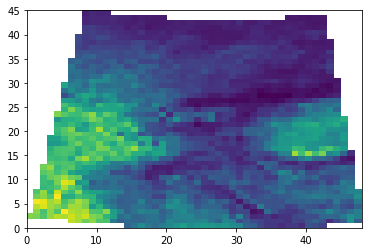

In [66]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline (this is only necessary when running the code in a notebook)
%matplotlib inline
# file = ''
plt.pcolormesh(cdd_mean) # vmin=0, vmax=360 )


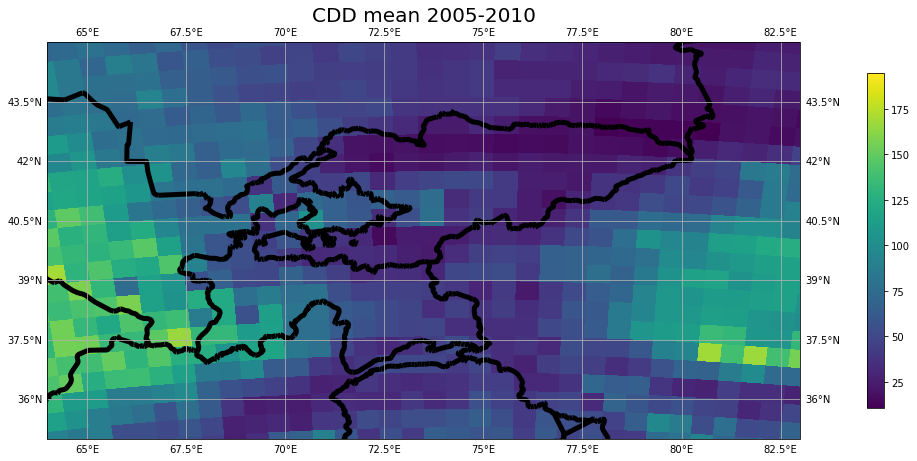

In [100]:
fig = plt.figure( figsize=(15,15 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([64, 83, 35, 45])
ax.add_feature(cfeature.BORDERS, linewidth=5)
ax.add_feature(cfeature.COASTLINE, linewidth=7)

cs = ax.pcolormesh(var['lon'][:], var['lat'][:], cdd_mean, transform=ccrs.PlateCarree(), #cmap=cmap, 
                   edgecolor='black', linewidth=0, alpha=1) #, vmin=0, vmax=3800)

plt.title('CDD mean 2005-2010', fontsize=20)
plt.colorbar(cs, fraction=0.02, pad=0.08)

ax.gridlines(draw_labels=True)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# save the graphic as a png:
plt.savefig(fname='/home/testuser/Pictures/CDD_mean2005-2010.png')

In [32]:
cdd_mean.cdd

<xarray.DataArray 'cdd' (y: 45, x: 48)>
array([[            'NaT',             'NaT',             'NaT', ...,
                    'NaT',             'NaT',             'NaT'],
       [            'NaT',             'NaT',             'NaT', ...,
         5529600000000000,  8964000000000000,  5572800000000000],
       [13759200000000000, 13543200000000000, 12420000000000000, ...,
         7365600000000000,  8812800000000000,  7840800000000000],
       ...,
       [            'NaT',             'NaT',             'NaT', ...,
                    'NaT',             'NaT',             'NaT'],
       [            'NaT',             'NaT',             'NaT', ...,
                    'NaT',             'NaT',             'NaT'],
       [            'NaT',             'NaT',             'NaT', ...,
                    'NaT',             'NaT',             'NaT']],
      dtype='timedelta64[ns]')
Coordinates:
    lat      (y, x) float64 29.17 29.24 29.32 29.39 ... 50.07 50.0 49.93 49.85
  * x        (x) float64 -1.4e+06 -1.35e+06 -1.3e+06 ... 8.5e+05 9e+05 9.5e+05
  * y        (y) float64 -1.9e+06 -1.85e+06 -1.8e+06 ... 2e+05 2.5e+05 3e+05
    lon      (y, x) float64 60.2 60.7 61.21 61.72 ... 86.25 86.97 87.68 88.39